In [31]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)


seed_everything(42)

df_train = pd.read_csv("../data/preprocessed/df_train001.csv")
df = pd.read_csv("../data/preprocessed/df.csv")

---

In [32]:
df_train.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.0,68.3,1.7,6.7,11.933,48.699342,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,11.933,48.699342,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,11.933,48.699342,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,11.933,48.699342,7.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,11.933,48.699342,-4.6


In [33]:
df_train['월'] = np.float64(df_train['일시'].str.split('-', expand=True)[1])
df_train['일'] = np.float64(df_train['일시'].str.split('-', expand=True)[2])

In [34]:
df['월'] = np.float64(df['일시'].str.split('-', expand=True)[1])
df['일'] = np.float64(df['일시'].str.split('-', expand=True)[2])

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X = df_train.drop(columns=['일시','평균기온'], axis=1)
y = df_train['평균기온']

In [38]:
X = scaler.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

---

In [41]:
import lightgbm as lgb

In [42]:
model = lgb.LGBMRegressor(learning_rate = 0.055, random_state=42, boosting_type='gbdt')

In [43]:
model.fit(x_train, y_train, eval_set=(x_test, y_test)) 

[1]	valid_0's l2: 99.0316
[2]	valid_0's l2: 88.5438
[3]	valid_0's l2: 79.1802
[4]	valid_0's l2: 70.7963
[5]	valid_0's l2: 63.3091
[6]	valid_0's l2: 56.6262
[7]	valid_0's l2: 50.6467
[8]	valid_0's l2: 45.2952
[9]	valid_0's l2: 40.5292
[10]	valid_0's l2: 36.257
[11]	valid_0's l2: 32.4315
[12]	valid_0's l2: 29.0284
[13]	valid_0's l2: 25.9744
[14]	valid_0's l2: 23.2477
[15]	valid_0's l2: 20.8108
[16]	valid_0's l2: 18.641
[17]	valid_0's l2: 16.6978
[18]	valid_0's l2: 14.9549
[19]	valid_0's l2: 13.3944
[20]	valid_0's l2: 12.0049
[21]	valid_0's l2: 10.7628
[22]	valid_0's l2: 9.65134
[23]	valid_0's l2: 8.65652
[24]	valid_0's l2: 7.76633
[25]	valid_0's l2: 6.97437
[26]	valid_0's l2: 6.26523
[27]	valid_0's l2: 5.62992
[28]	valid_0's l2: 5.06147
[29]	valid_0's l2: 4.55389
[30]	valid_0's l2: 4.09948
[31]	valid_0's l2: 3.69378
[32]	valid_0's l2: 3.33122
[33]	valid_0's l2: 3.00772
[34]	valid_0's l2: 2.71742
[35]	valid_0's l2: 2.4587
[36]	valid_0's l2: 2.22689
[37]	valid_0's l2: 2.01975
[38]	valid_0'

LGBMRegressor(learning_rate=0.055, random_state=42)

In [44]:
model.score(x_train, y_train)

0.9980724741383658

In [45]:
model.score(x_test, y_test)

0.9977053583833767

---

In [46]:
sub_file = pd.read_csv("../data/original/sample_submission.csv")

In [47]:
df = scaler.transform(df.drop(columns='일시', axis=1))

In [48]:
sub_file['평균기온'] = model.predict(df)

<AxesSubplot:>

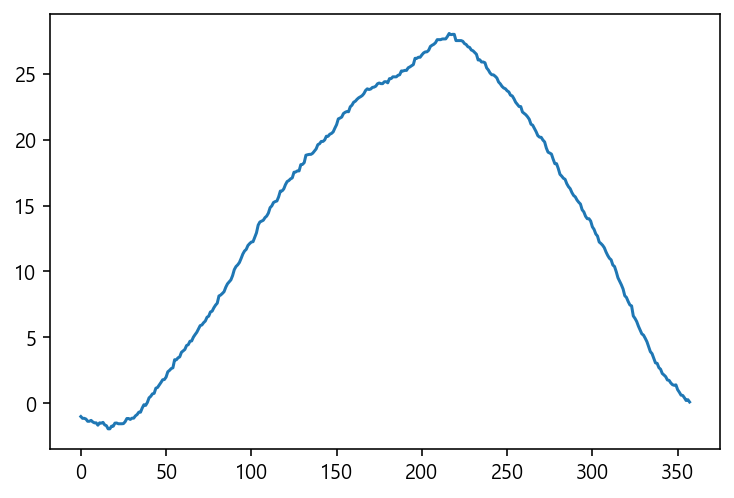

In [49]:
sub_file['평균기온'].plot()

In [50]:
sub_file.to_csv("../data/sub/020_df_lightgbm_001.csv",
                index=False, encoding='utf-8')

---

In [51]:
import joblib

In [52]:
joblib.dump(model, '../model/lightgbm_001.pkl')

['../model/lightgbm_001.pkl']

In [53]:
loaded_model = joblib.load('../model/lightgbm_001.pkl')